In [1]:
import pandas as pd
import wandb
import pickle


import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

In [2]:
df = pd.read_csv('../data/treesXYZ/meta/META.csv')

In [3]:
sp = 'DEAD'
print(df[(df['sp']==sp) & (df['multistem']==1)].shape[0])
print(df[(df['sp']==sp) & (df['dead']==1)].shape[0])
print(df[(df['sp']==sp) & (df['out_of_bounds']==0)].shape[0])

0
1
0


In [5]:
wandb.login()

wandb: Currently logged in as: mja2106 (use `wandb login --relogin` to force relogin)


True

In [2]:
def get_metrics_from_wandb(run_id):
    api = wandb.Api()
    run = api.run(f"mja2106/laser-trees/{run_id}")
    
    for x in run.config:
        print(f"{x}: {run.config[x]}")
        
    print("  ")
    
    best_accuracy = run.history()["Validation Accuracy"].max()
    converged_accuracy = run.history()["Validation Accuracy"].values[-1]
    print(f"Best validation accuracy: {best_accuracy}")
    print(f"Converged accuracy: {converged_accuracy}")
          
    min_prod_acc = run.history()[["PINNIG Accuracy", "PINPIN Accuracy", "QUEFAG Accuracy", "PINSYL Accuracy"]].min(axis=1)
    best_min_prod_acc = min_prod_acc.max()
    print(f"Best minimum producer accuracy: {best_min_prod_acc}")
    
    
    return run

In [5]:
run = get_metrics_from_wandb("29jdopp5")

f: 1
model: SimpleView
epochs: 300
voting: None
loss_fn: cross-entropy
species: ['QUEFAG', 'PINNIG', 'QUEILE', 'PINSYL', 'PINPIN']
momentum: 0.9
image_dim: 256
num_views: 6
optimizer: adam
batch_size: 128
jitter_std: 0.0003
soft_min_k: 50
transforms: ['translation', 'jitter']
camera_dist: 1.4
random_seed: 0
dataset_type: utils.dataset.TreeSpeciesPointDataset
max_rotation: 6.283185307179586
min_rotation: 0
learning_rate: [0.0005, 100, 0.5]
train_sampler: balanced
camera_fov_deg: 90
data_resolution: 2.5cm
depth_averaging: min
max_translation: 0.5
min_translation: 0
shuffle_dataset: True
validation_split: 0.2
  
Best validation accuracy: 0.7878787878787878
Converged accuracy: 0.7636363636363637
Best minimum producer accuracy: 0.5476190476190477


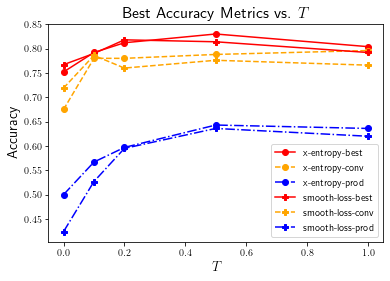

In [7]:
#Translation
T = [0, 0.1, 0.2, 0.5, 1]

table_data = {}
table_data["x-entropy"] = [0.752, 0.675, 0.500, 0.792, 0.780, 0.567, 0.812, 0.780, 0.597, 0.830, 0.788, 0.643, 0.804, 0.796, 0.636]
table_data["smooth-loss"] = [0.767, 0.719, 0.424, 0.790, 0.786, 0.527, 0.818, 0.760, 0.595, 0.814, 0.776, 0.636, 0.792, 0.766, 0.620]

translation_data = {}
translation_data["T"] = T

for loss_fn in ["x-entropy","smooth-loss"]:
    for i, metric in enumerate(["best","conv","prod"]):
        key = f"{loss_fn}-{metric}"
        translation_data[key] = table_data[loss_fn][i::3]

df = pd.DataFrame.from_dict(translation_data)

df = df.set_index("T")

markers=['o','o','o','P','P','P']
hue=['r','orange','b','r','orange','b']
linestyles=['-','--','-.','-','--','-.']

ax = df.plot(color=hue)

for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(linestyles[i])
    
axFont = 14 
tFont = 16
ax.set_ylabel('Accuracy', size=axFont)
ax.set_xlabel('$T$', size=axFont)
ax.set_title('Best Accuracy Metrics vs. $T$', size=tFont)
ax.legend()

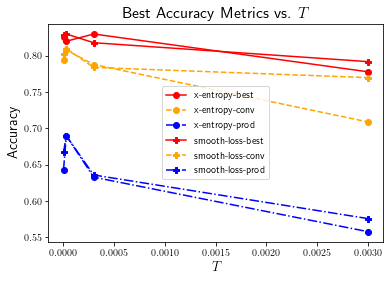

In [8]:
#Translation
sigma_j = [0, 3e-5, 3e-4, 3e-3]

table_data = {}
table_data["x-entropy"] = [0.826, 0.794, 0.643, 0.820, 0.808, 0.690, 0.830, 0.788, 0.633, 0.778, 0.709, 0.558]
table_data["smooth-loss"] = [0.828, 0.802, 0.667, 0.830, 0.810, 0.690, 0.818, 0.784, 0.636, 0.792, 0.770, 0.576]

translation_data = {}
translation_data["sigma"] = sigma_j

for loss_fn in ["x-entropy","smooth-loss"]:
    for i, metric in enumerate(["best","conv","prod"]):
        key = f"{loss_fn}-{metric}"
        translation_data[key] = table_data[loss_fn][i::3]

df2 = pd.DataFrame.from_dict(translation_data)

df2["sigma"][0] = 3e-6
df2 = df2.set_index("sigma")

markers2=['o','o','o','P','P','P']
hue2=['r','orange','b','r','orange','b']
linestyles2=['-','--','-.','-','--','-.']

ax = df2.plot(color=hue)

for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(linestyles[i])
    
axFont = 14 
tFont = 16
ax.set_ylabel('Accuracy', size=axFont)
ax.set_xlabel('$T$', size=axFont)
ax.set_title('Best Accuracy Metrics vs. $T$', size=tFont)
ax.legend()

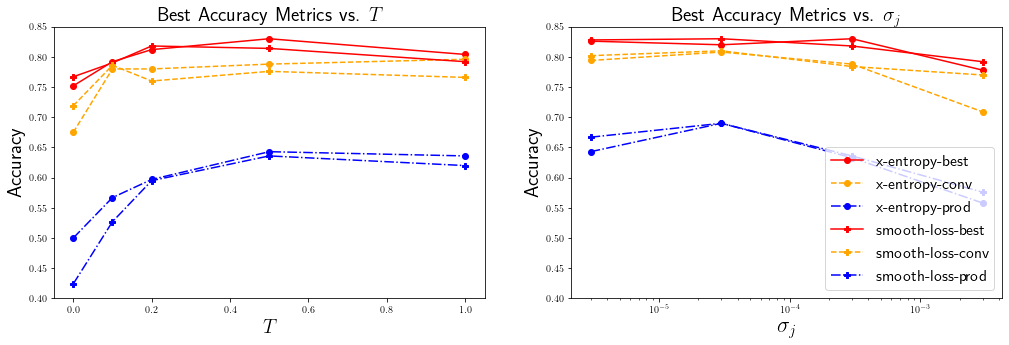

In [9]:
fig, ax = plt.subplots(1,2, figsize=(17,5))

#LHS=================================~
df.plot(ax=ax[0], color=hue)

for i, line in enumerate(ax[0].get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(linestyles[i])

axFont = 20 
tFont = 20
ax[0].set_ylabel('Accuracy', size=axFont)
ax[0].set_xlabel('$T$', size=axFont)
ax[0].set_title('Best Accuracy Metrics vs. $T$', size=tFont)
ax[0].get_legend().remove()
ax[0].set_ylim(0.4,0.85)
    
    
#RHS=================================
df2.plot(ax=ax[1], color=hue)

for i, line in enumerate(ax[1].get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(linestyles[i])


ax[1].set_ylabel(r'Accuracy', size=axFont)
ax[1].set_xlabel(r'$\sigma_j$', size=axFont+2)
ax[1].set_title(r'Best Accuracy Metrics vs. $\sigma_j$', size=tFont)
ax[1].set_xscale('log')
ax[1].legend(loc='lower right', fontsize=16)  
ax[1].set_ylim(0.4,0.85)
#ax[1].set_xticks([3e-5,3e-4,3e-3,3e-2])

fig.savefig('fig.png', bbox_inches='tight')

In [93]:
accuracies = {'best': {'soft': [0.8303030303030303,
   0.8363636363636363,
   0.8383838383838383,
   0.8464646464646465,
   0.8444444444444444,
   0.8444444444444444,
   0.8464646464646465],
  'hard': [0.8303030303030303,
   0.8262626262626263,
   0.8222222222222222,
   0.8444444444444444,
   0.8464646464646465,
   0.8464646464646465,
   0.8484848484848485]},
 'converged': {'soft': [0.8101010101010101,
   0.8121212121212121,
   0.8101010101010101,
   0.8121212121212121,
   0.8181818181818182,
   0.8161616161616162,
   0.8161616161616162],
  'hard': [0.8101010101010101,
   0.806060606060606,
   0.8121212121212121,
   0.8181818181818182,
   0.8141414141414142,
   0.8181818181818182,
   0.8181818181818182]},
 'best_prod': {'soft': [0.8222222222222222,
   0.8121212121212121,
   0.8181818181818182,
   0.8161616161616162,
   0.8141414141414142,
   0.8121212121212121,
   0.8161616161616162],
  'hard': [0.8222222222222222,
   0.8242424242424242,
   0.8161616161616162,
   0.8101010101010101,
   0.8161616161616162,
   0.8161616161616162,
   0.8222222222222222]}}

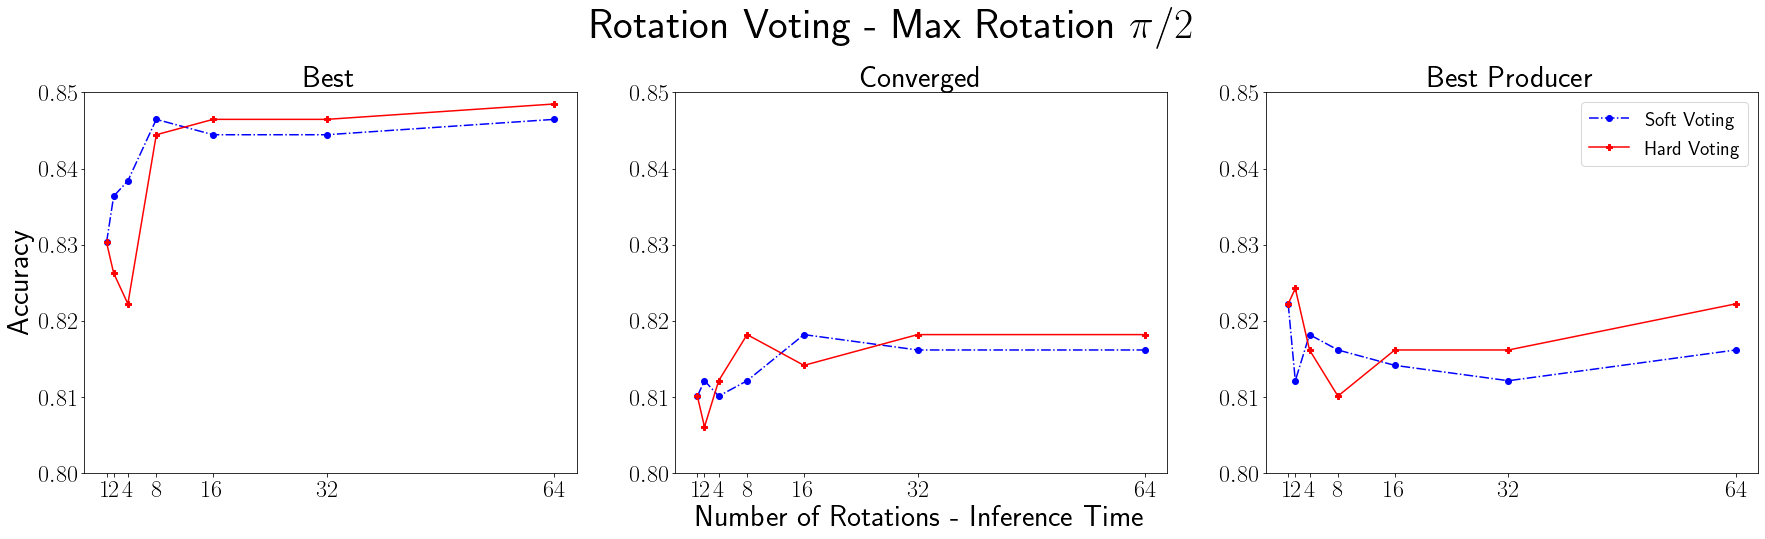

In [96]:
rotFig, rotAx = plt.subplots(1,3, figsize=(30,7))

num_rotations = [1,2,4,8,16,32,64]
titles = ['Best', 'Converged', 'Best Producer']

axFont = 30
tFont = 30
tickFont = 24

rotAx[0].set_ylabel('Accuracy', fontsize=axFont)

for idx, model in enumerate(accuracies):
    rotAx[idx].set_title(titles[idx], fontsize=tFont)
    rotAx[idx].set_ylim((0.8,0.85))
    rotAx[idx].tick_params(labelsize=tickFont)
    rotAx[idx].plot(num_rotations, accuracies[model]["soft"], color='b', marker='o', linestyle='-.')
    rotAx[idx].plot(num_rotations, accuracies[model]["hard"], color='r', marker='P')
    
    #rotAx[idx].set_xscale('log')
    rotAx[idx].set_xticks(num_rotations)
    #rotAx[idx].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
rotAx[1].set_xlabel("Number of Rotations - Inference Time", fontsize=axFont)    
rotAx[2].legend(["Soft Voting","Hard Voting"], fontsize=20)

rotFig.suptitle('Rotation Voting - Max Rotation $\pi/2$', fontsize = tFont+12, y=01.05)
rotFig.savefig('180_rotvot.png', bbox_inches='tight')